## **Imports**

In [1]:
import pandas as pd
import numpy as np

## **Data loading and analysis**

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Distribution of target variable (class imbalance)
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [6]:
# Check for unique enteries in each feature column
print(df.nunique())
#Unique values in type column
unique_types = df['type'].unique()
print(unique_types)
print(df['isFraud'].unique())
print(df['isFlaggedFraud'].unique())

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
[0 1]
[0 1]


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

**Findings**
- No null values, or duplicated columns
- useless columns / features: nameOrig, nameDest, as those are just user IDs, and they will be constant and does not contain much information about a transaction behaviour.
- I removed the columns nameOrig and nameDest because they are IDs, but I imagined a scenario where tracking a user’s activity across transactions—as both sender and receiver—could help spot suspicious patterns repeating over time. However, processing this would require additional steps beyond the current scope.

## **Data Cleaning**

In [9]:
# Fill missing merchant balances with -1 (indicating no info)
df['oldbalanceDest'] = df['oldbalanceDest'].fillna(-1)
df['newbalanceDest'] = df['newbalanceDest'].fillna(-1)

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## **Preprocessing**

In [24]:
# Encode categorical column type
# We will use One Hot Encoding on type column, as it is a nominal data

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_type = ohe.fit_transform(df[['type']])
ohe_columns = ohe.get_feature_names_out(['type'])

# Convert the encoded data into a dataframe, so we can add it in our original dataset as new columns
encoded_type_df = pd.DataFrame(data = encoded_type, columns = ohe_columns)
encoded_type_df.head()

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [12]:
#Concat Dataframes
df = pd.concat([df, encoded_type_df], axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [13]:
# Drop type column and useless columns
df_model = df.drop(columns=['type', 'nameOrig', 'nameDest'], axis=1)
df_model.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,1.0,0.0


## **Feature Engineering**

In [14]:
# Let us look at correlations first
corr_matrix = df_model.corr()
corr_matrix['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
type_TRANSFER     0.053869
isFlaggedFraud    0.044109
step              0.031578
type_CASH_OUT     0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
type_DEBIT       -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
type_PAYMENT     -0.025697
Name: isFraud, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

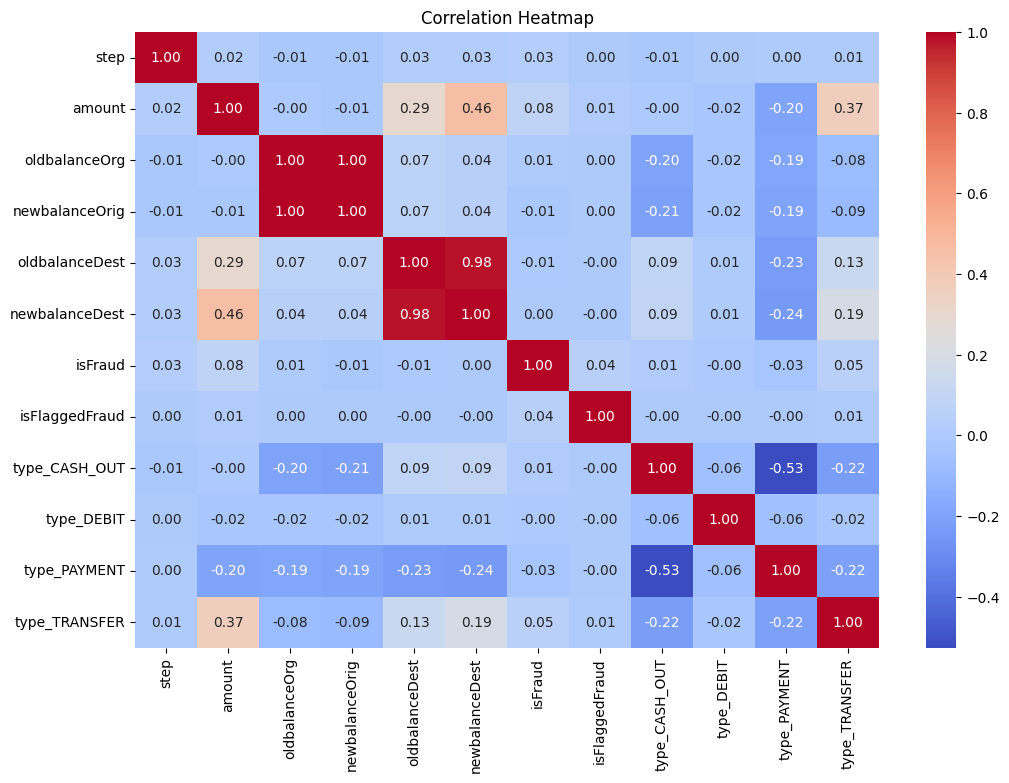

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data = corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Finding from heatmap**

- oldbalanceDest and newbalanceDest (0.980.98): Strong positive correlation—these features are almost the same for each row, so using both could be redundant.

- type_PAYMENT and type_CASH_OUT (−0.53−0.53): Strong negative correlation—since a transaction cannot be both types, they are inversely related.

- amount and newbalanceDest (0.460.46): Moderate positive correlation—higher amounts likely increase recipient balance.

- isFraud has low correlation with everything—so fraud is not easily detected with a simple linear relationship to existing features, justifying the need for advanced features or models.


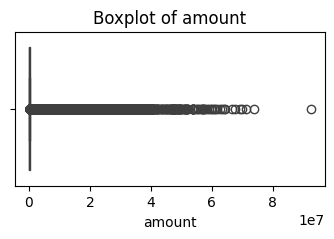

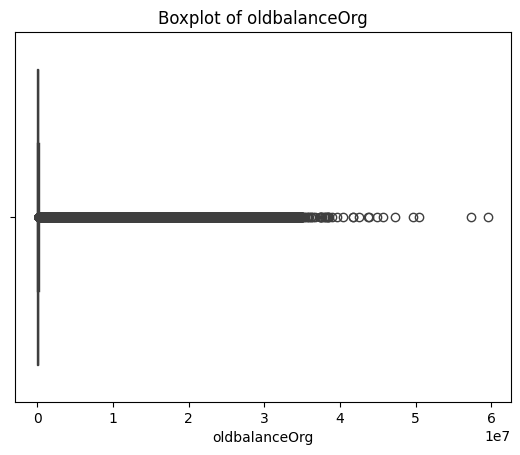

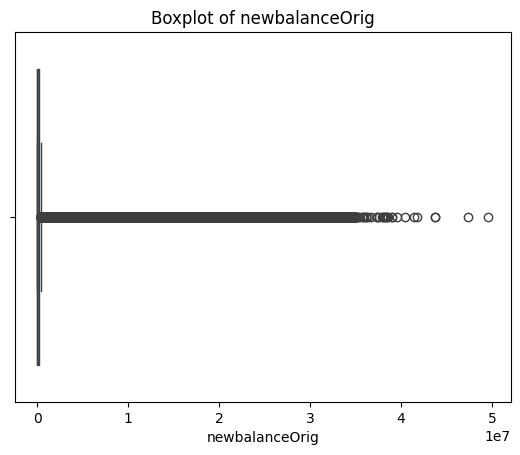

In [17]:
# Lets check for outliers
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

plt.figure(figsize=(4, 2))

for column in columns_to_check:
    sns.boxplot(x = df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

**Findings from Boxplot**
- Have some outliers, but seem like no need to remove them, as we may loose some important data which might be important in this fraud detection.

In [18]:
# Transaction amount to old balance ratio 
df_model['amount_to_oldbalance_ratio'] = df_model['amount'] / (df_model['oldbalanceOrg'] + 1) # +1 to avoid division by zero 

# Balance change in origin account
df_model['orig_balance_change'] = df_model['newbalanceOrig'] - df_model['oldbalanceOrg']

# Balance change in destination account
df_model['dest_balance_change'] = df_model['newbalanceDest'] - df_model['oldbalanceDest']
df_model.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_to_oldbalance_ratio,orig_balance_change,dest_balance_change
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.057834,-9839.64,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.087731,-1864.28,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.994505,-181.00,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1.0,0.0,0.0,0.0,0.994505,-181.00,-21182.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.280788,-11668.14,0.0


Created some new features that will capture some usual fraud behaviours, like 
- aim to steal money by transferring and then cashing out funds.
- Differences or ratios between transaction amount and balances reveal sudden changes in amount / balance.
- Ratio of amount to old balance (how much of the balance is moved).

## **Model Training**

In [19]:
# We will split data manuaally to keep temporal order of transactions
# As it might make a data leakage


#Take out max step from data, and get 80% of it, so we can split data in 80-20
cutoff_step = int(df['step'].max() * 0.8)
train_df = df_model[df_model['step'] <= cutoff_step]
val_df = df_model[df_model['step'] > cutoff_step]

X_train = train_df.drop(columns=['isFraud', 'isFlaggedFraud'])
y_train = train_df['isFraud']

X_val = val_df.drop(columns=['isFraud', 'isFlaggedFraud'])
y_val = val_df['isFraud']

- Looking at the step, it is nothing but time, and is important in frauds. Our dataset is a 30 days simulation, and all the data is on order with respect to time.
- That means the later rows represents later days, that means future days, so if we splitted data randomly using train_test_split, some of the future day data might come in training dataset, and that would be a data leakage.
- If we think, model should be trained on past data and predict future values. So it is important to split the data in such a way that, no future values should be in training data, thats why we splitted data manually w.r.t step column. 

In [20]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_val_scaled)
y_proba = rf.predict_proba(X_val_scaled)[:, 1]

- Chose random forest classifier, because it is well-suited for fraud detection because it handles large, complex datasets with many features, manages imbalanced classes effectively using class weighting, is robust to outliers and noise, and captures non-linear relationships without requiring heavy data preprocessing. It also provides useful feature importance insights, helping interpret what drives fraud predictions.
- Also I have already trained one model for fraud detection before and also searched for which model will be best for this case.

## **Model Evaluation**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    121926
           1       0.99      0.98      0.98      1654

    accuracy                           1.00    123580
   macro avg       0.99      0.99      0.99    123580
weighted avg       1.00      1.00      1.00    123580

ROC AUC Score: 1.0000
PR AUC Score: 0.9987


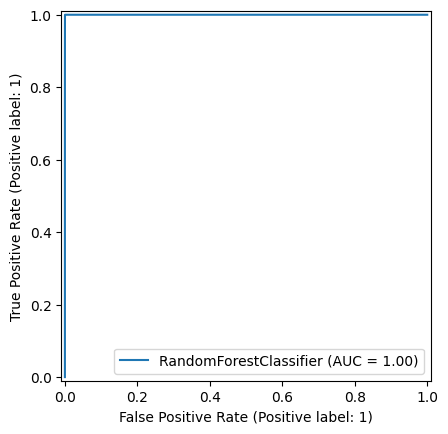

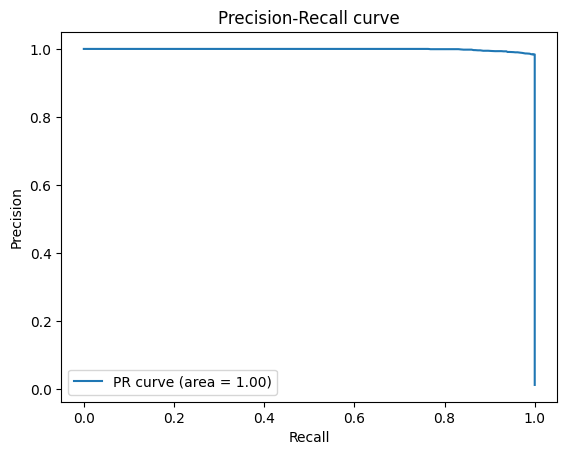

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_val, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC Score: {pr_auc:.4f}")

# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_val_scaled, y_val)
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()


**Feature Importance**

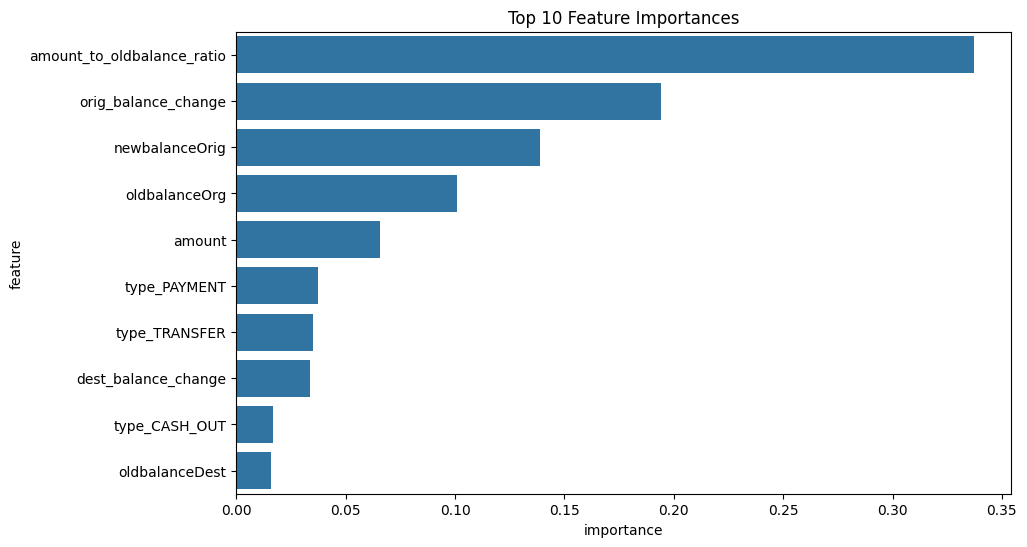

In [23]:
importances = rf.feature_importances_
feat_names = X_train.columns

feature_importance_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.show()

**Remarks after model evaluation**
- After getting 99 accuracy, seems like we dont need to do hyperparameter tuning, model is already working best.
- New features that we created in the feature engineering, played a very importnat role in the model training.

# **Final Report**

**Data cleaning including missing values, outliers and multi-collinearity.**
- No missing values found
- Found outliers, but removing them might lose any important rows
- Found important correlations, like, oldbalanceDest and newbalanceDest these features are almost same, so taking both in consideration might be redundant, but still tried to train including both columns, got superb accuracy.

**Fraud detection model in elaboration.**
- Began by exploring dataset, found that two columns : nameOrig, nameDest are useless as those are user IDs. As well as there were no null values in the dataset.
- Found only one column with categorical values, i.e. types, used One hot encoding .
- Droppped useless columns and old type column.
- Done feature engineering, and thought what a fraudster might do for a fraud, like transfering a big amount of money, or rapid change in a balance. So to detect that, I did:- Done feature engineering, and thought what a fraudster might do for a fraud, like transfering a big amount of money, or rapid change in a balance. So to detect that, I created following new features:
  Ratio of transaction amount to the sender’s old balance (amount_to_oldbalance_ratio) to detect unusually large transfers relative to available funds.
  Changes in balances of both origin and destination accounts before and after transactions to capture abrupt shifts.
- Now, while training, recognizing the temporal nature of transactions, I used the step variable (representing hours) to split the data chronologically into training and validation sets, simulating a real-world scenario where the model predicts future fraud from past transactions. And feature scaling was applied using StandardScaler().
- Given the imbalanced nature of fraud detection, I selected a Random Forest classifier with class_weight='balanced' to give more importance to the minority class within the training process.
- The model’s effectiveness was measured using precision, recall, F1-score, ROC AUC, and Precision-Recall AUC, prioritizing metrics suitable for imbalanced classification tasks.
Achieved very high performance (precision and recall near 0.99) indicating reliable differentiation between fraudulent and legitimate transactions.
- And from feature importance, got that new features that we created in the feature engineering, played a very importnat role in the model training.

**What kind of prevention should be adopted while company update its infrastructure?**

The company should put in place smarter fraud detection systems that watch for unusual transaction patterns in real time. This includes setting limits on big transfers, adding extra verification steps for risky activities, and regularly updating security tools based on the latest fraud trends. It’s also important to train staff and customers about safe practices.

**How would you know if these prevention actions are working?**

We can monitor transactions using new insights, compare before and after changes, regular reviews.